## Convolution은 무엇인가

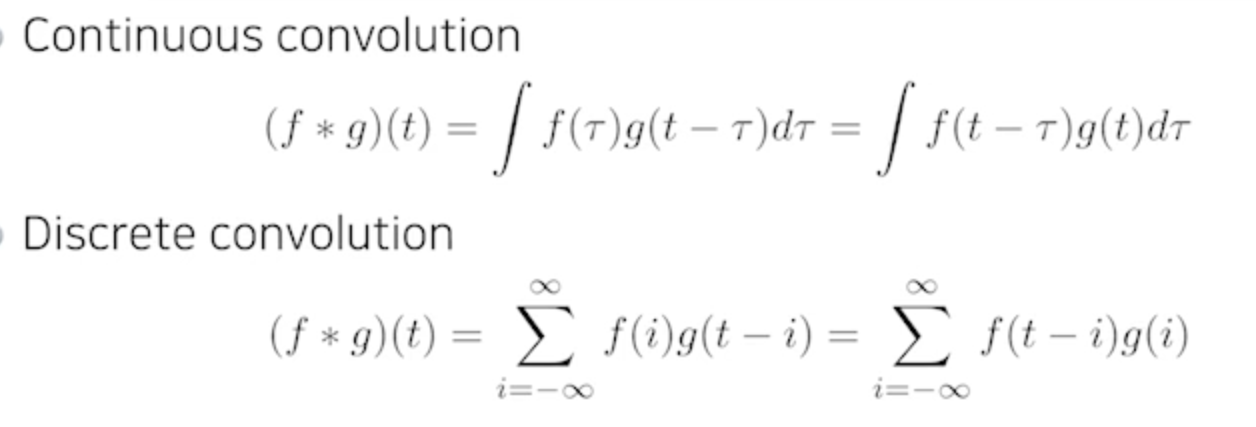

두 개의 함수를 섞어주는 operation으로 정의하게 되며

이미지의 경우, 다음과 같이 정의될 수 있다

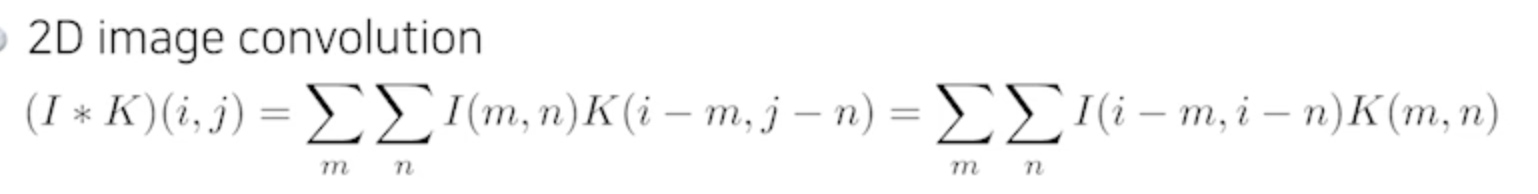

I : 전체 이미지 공간, K : 필터

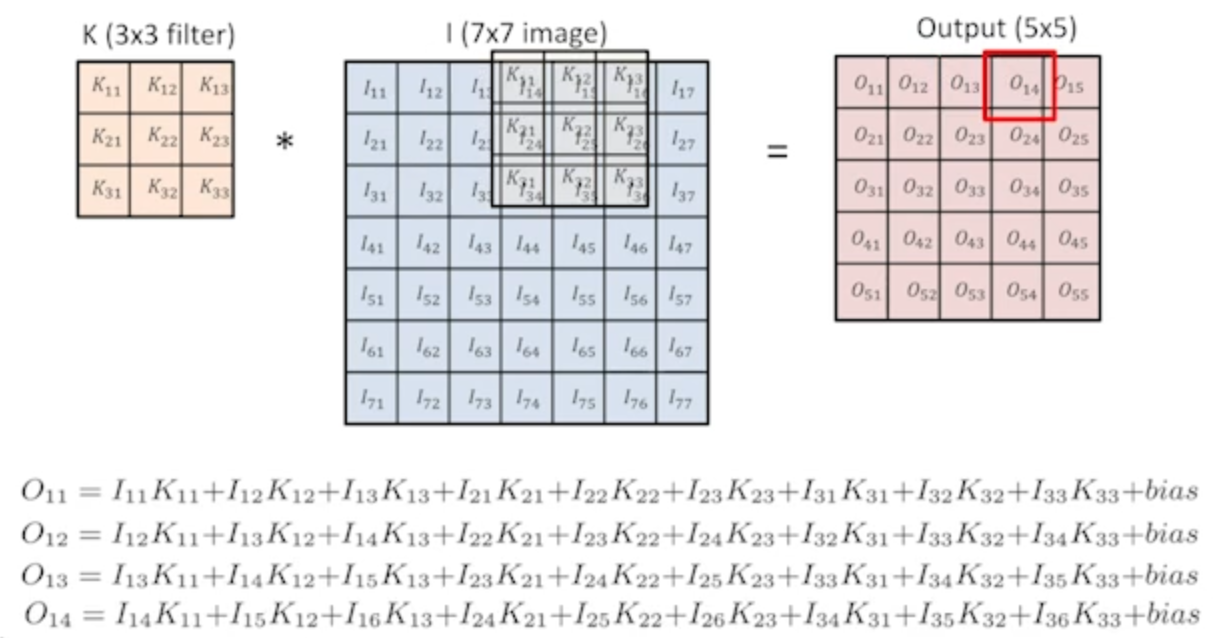

이미지에 커널을 씌워 모두 더한 값 = 하나의 아웃풋이 된다
- 적용하려는 필터에 따라 아웃풋이 달라진다
- 만약 3x3의 필터가 모두 1/9의 값을 가지게 된다면, 각 이미지 값에 대한 평균 값을 가지고 있게 되는 것이며 이는 곧 블러 처리가 된 이미지가 아웃풋으로 나오게 된다

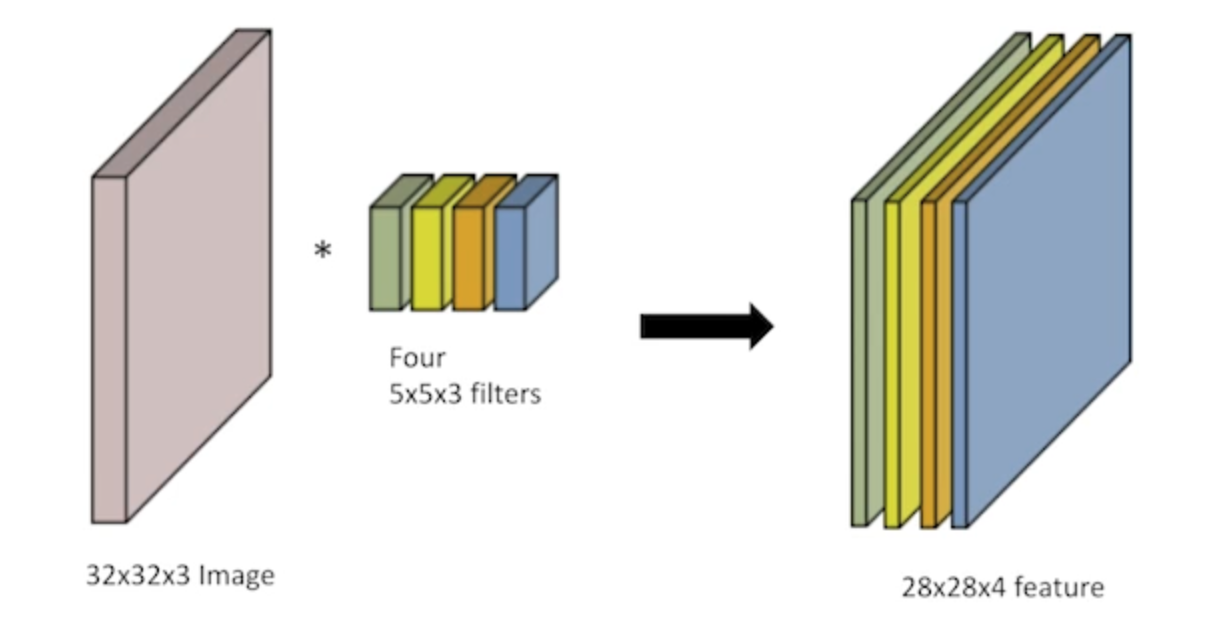

- 필터의 사이즈는 이미지와 동일하게 가지게 되며, feature map의 개수는 필터의 개수와 동등하다

#### Stack of convolutions
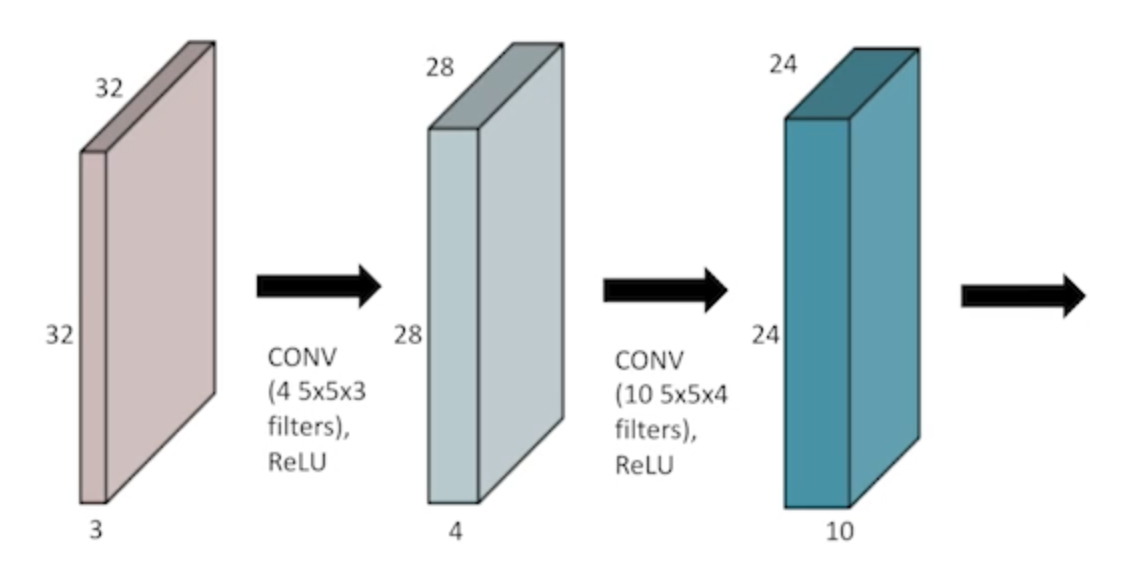
- 필터의 개수 = output feature map의 개수
- 필터의 3차원 값 = input image의 마지막 차원
- feature map은 activation function을 거쳐 나오게 된다

CNN
- convolution layer, pooling layer, fully connected layer를 포함한다
  - convolution layer, pooling layer : feature extraction, 유용한 특징을 추출하는 것
  - Fully connected layer : decision making (classification 등)

- 최근에는 fully connected layer가 없어지는 추세이다!
  - 파라미터가 많아질수록 generalization 능력이 떨어지게 되고, 학습이 어려워져

#### Stride

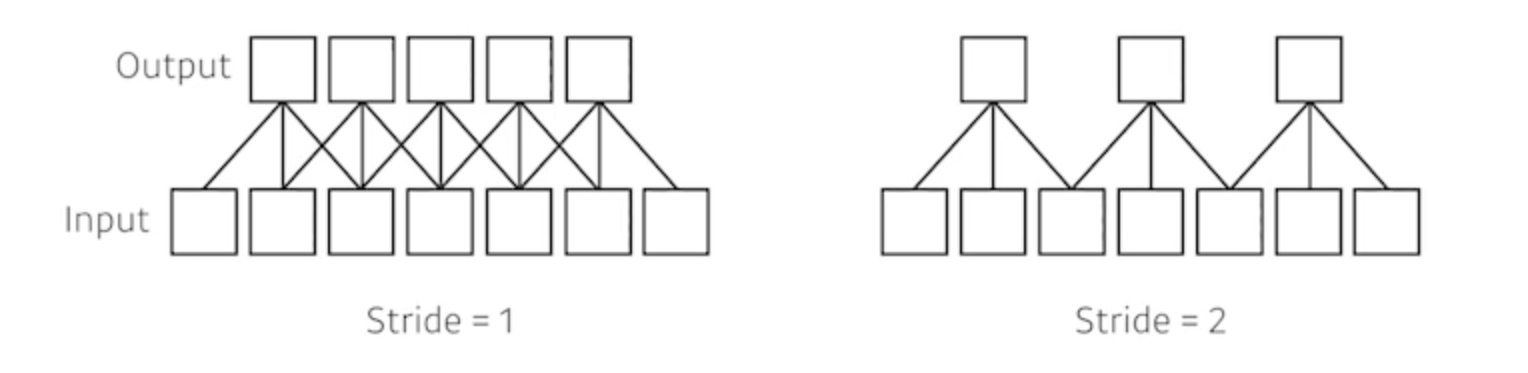

- 얼마나 필터를 간격을 두고 feature map을 만들 것인지
- stride = 2인 경우, 앞 input과의 간격이 2 늘어난 것을 볼 수 있음
- 현재는 1d이지만, height와 width 기준으로 stride가 2개로 정의될 수 있음

#### Padding

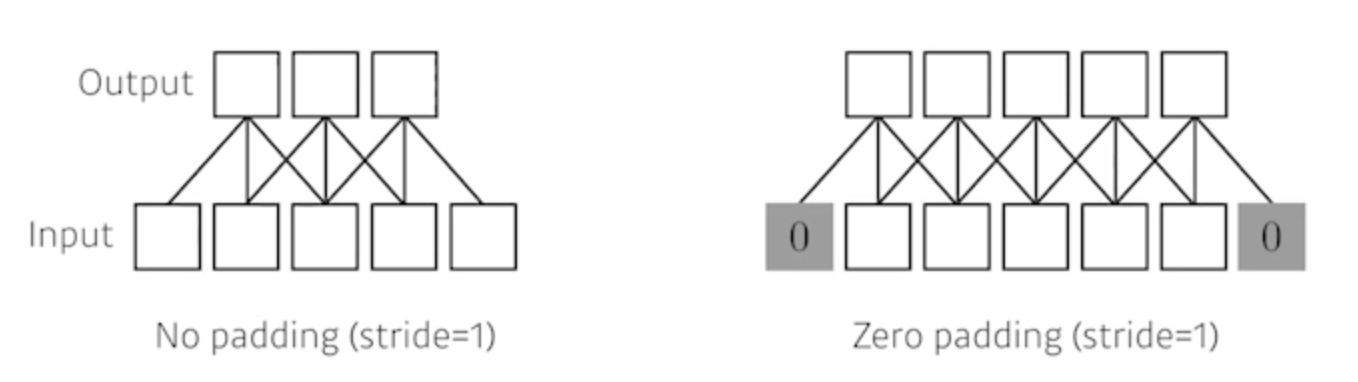

- 가장자리는 빼고 feature을 추출하게 되는데, 이를 위해 가장자리에 값을 채워주는 것을 말함
- zero padding시에는 ouput과 input의 개수가 동일하게 이루어지게 된다

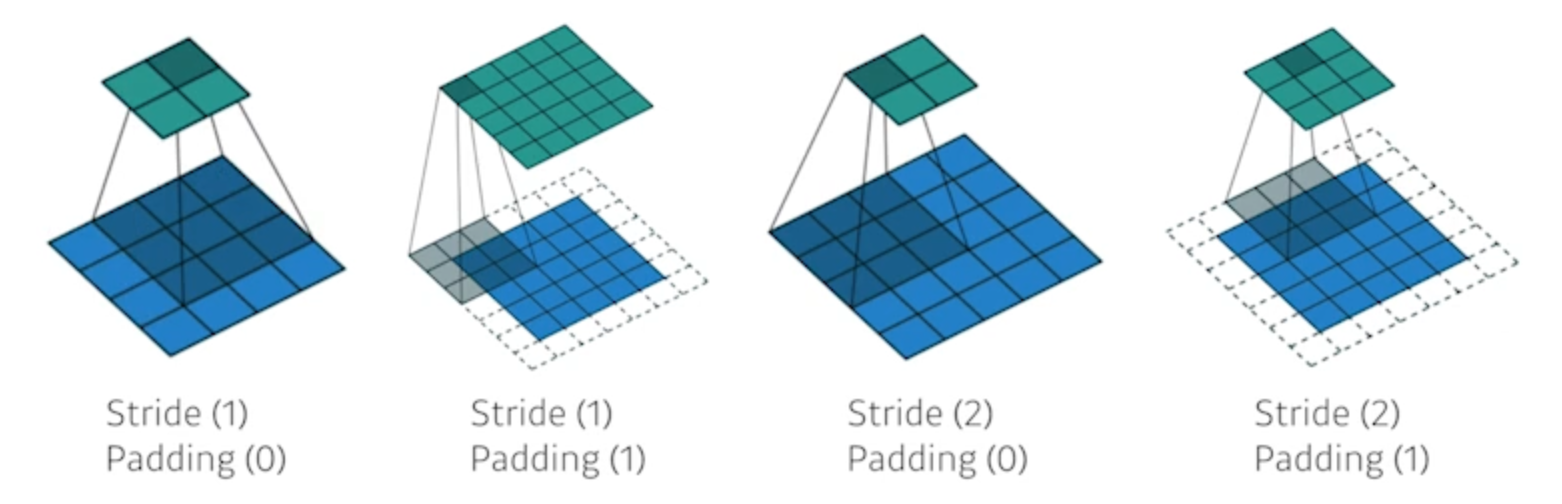

#### Convolution Arithmetic

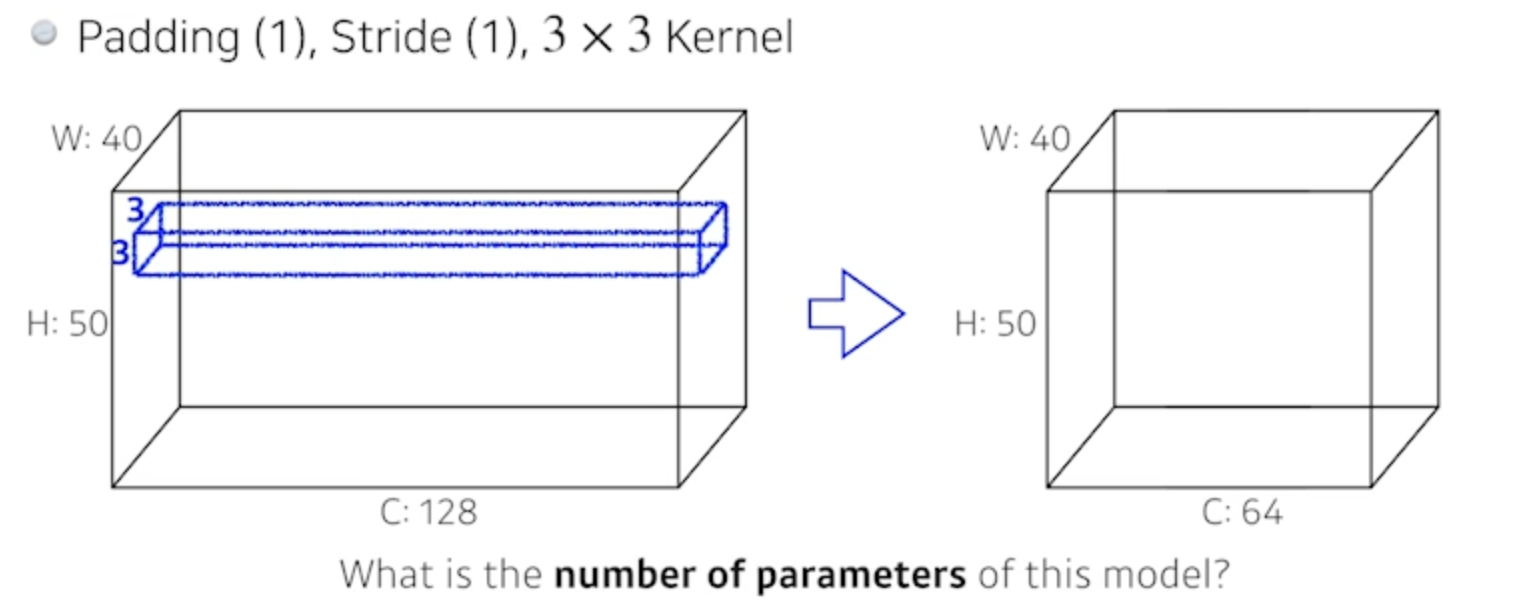

- 커널의 3차원은 channel과 동일하고, ouput의 채널이 64이므로, 결국 커널의 개수가 64이어야 한다
- 즉, 파라미터의 개수는 3 x 3 x 128 x 64 = 73,728

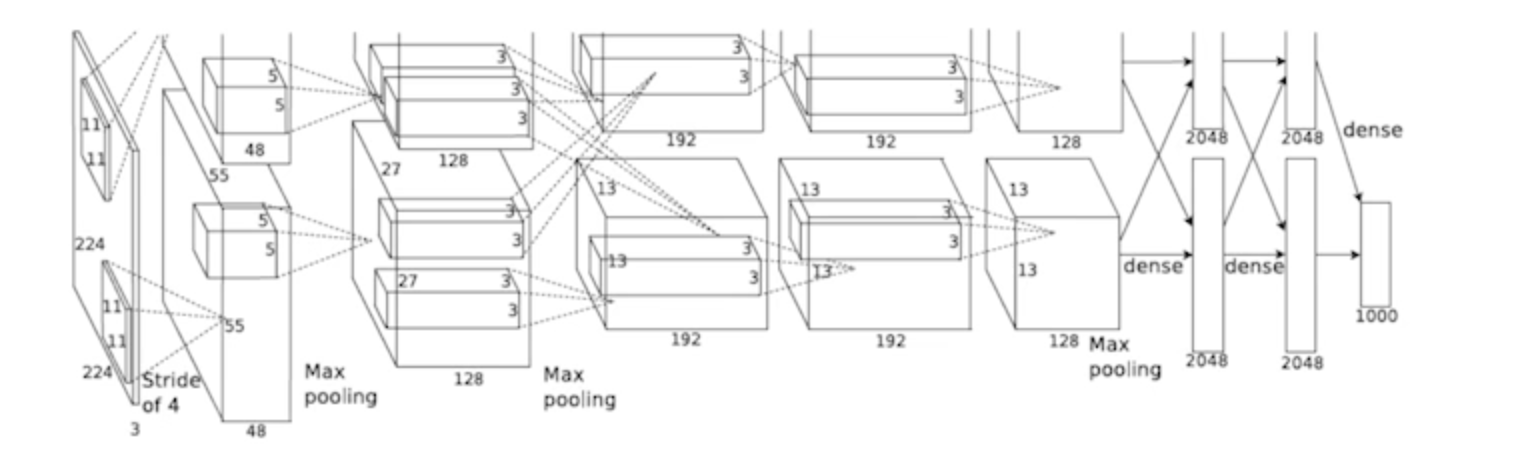

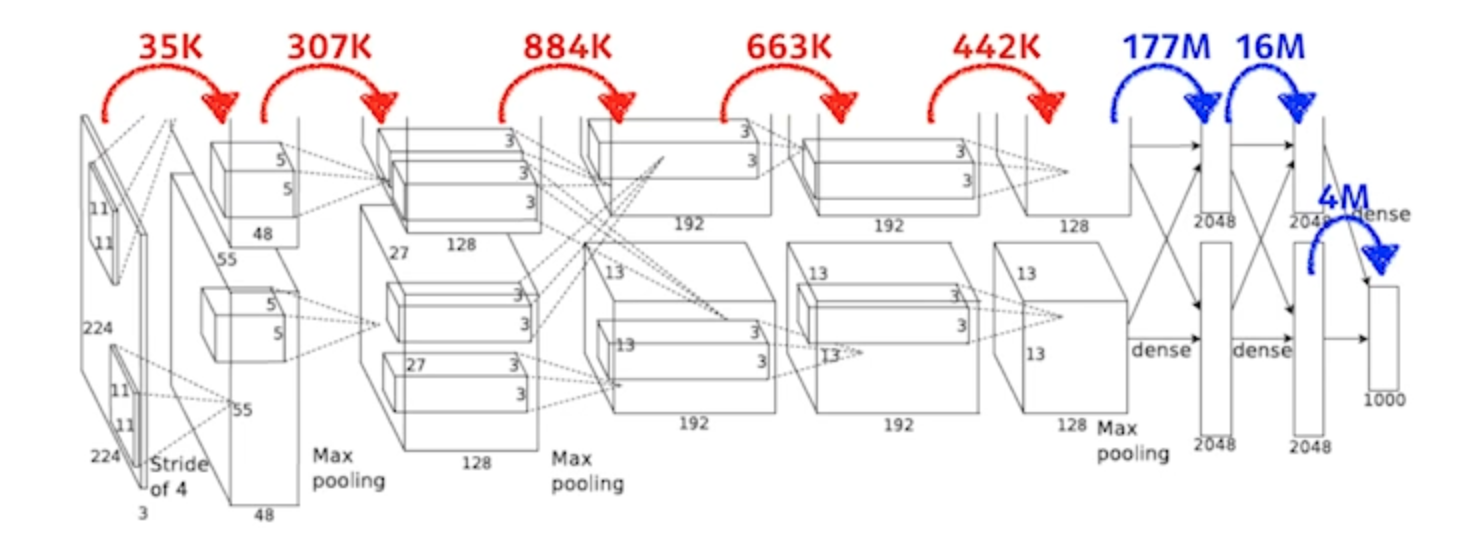

convolution layer (빨간색)보다 dense layer (파란색)으로 넘어갈시 파라미터의 개수가 훨씬 큰 것을 볼 수 있다
- 각각의 하나의 커널이 모든 위치에 동일하게 적용돼서 그렇다
  - 일종의 sharing이라고 볼 수 있다 -> 같은 커널이 모든 이미지에 대해 적용되니까
  - 그래서 일종의 sharing을 진행하는 convolution layer는 dense layer보다 더 파라미터의 개수가 더 작게 된다
- 그래서 fully 연산을 최대한 줄이는 시도를 했다

#### 1x1 convolution
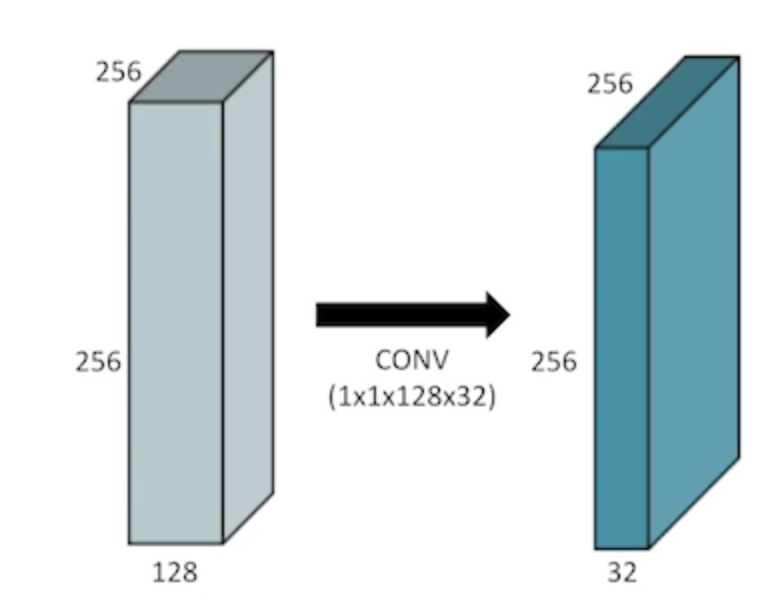

왜 하는가?
- dimension reductino (chnnel을 줄이기 위함)
  - 더 깊게 쌓지만, 파라미터의 수를 줄일 수 있다

## CNN 연산 이해하기

Convolution 연산 : 신호를 커널을 이용해 국소적으로 증폭 또는 감소시켜서 정보를 추출 또는 필터링하는 것

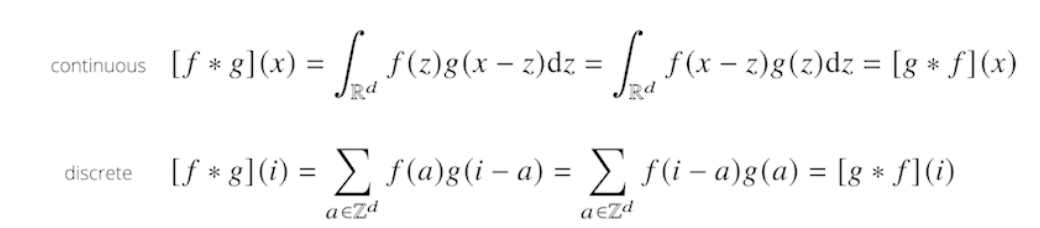

- z를 움직여가면서 적분하거나 더해주는 행텨로 연산 수행
- g : 신호 (x-z), f : 커널 (z)

convolution 연산은 1차원 뿐만 아니라 다양한 차원에서 계산 가능하다

2차원 연산은 이와 달리 커널을 입력벡터 상에서 움직여가면서 선형모델과 함성함수가 적용되는 구조이다.

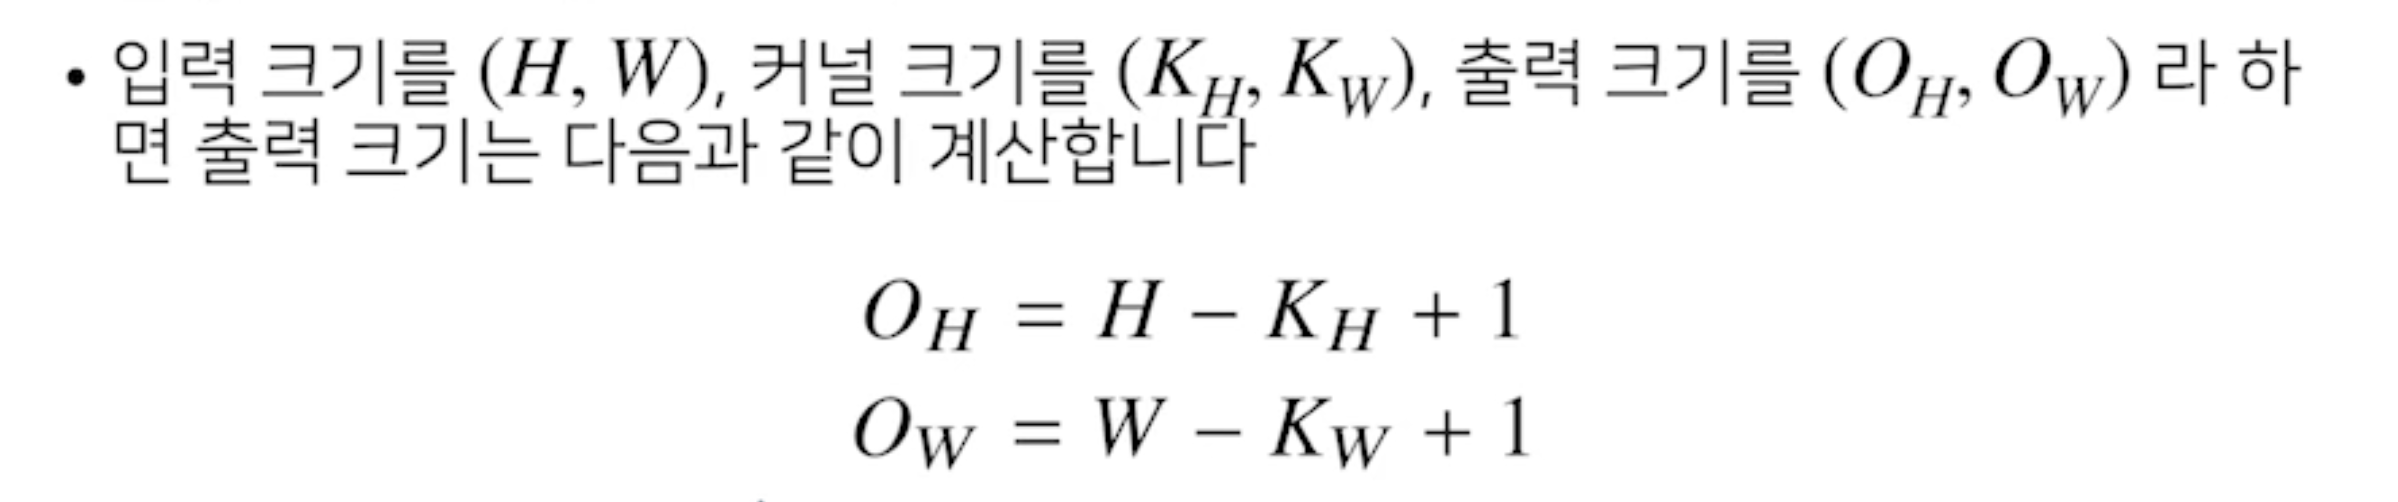

- 28x28 입력을 3x3 커널을 적용하면, 26x26이 된다

채널이 여러개인 2차원 입력의 경우, 2차원 convolution을 채널 개수만큼 적용하게 된다

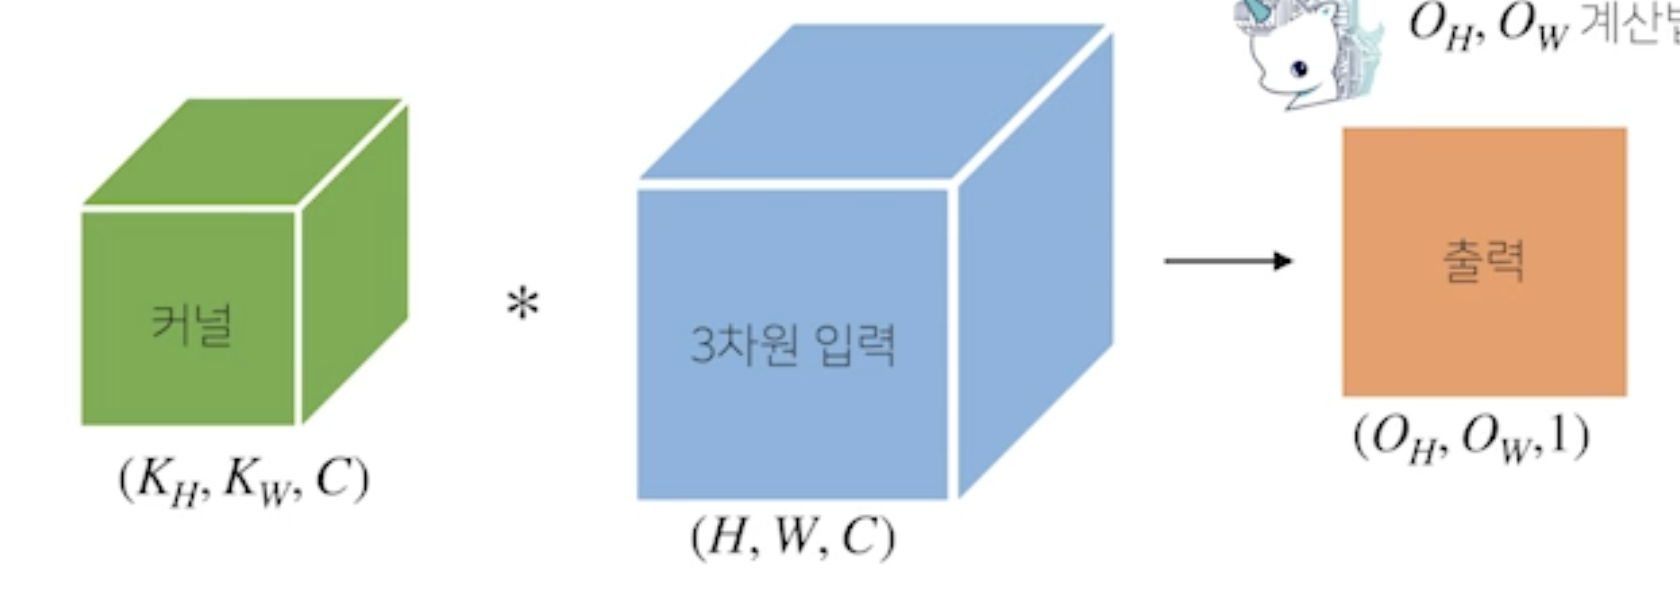

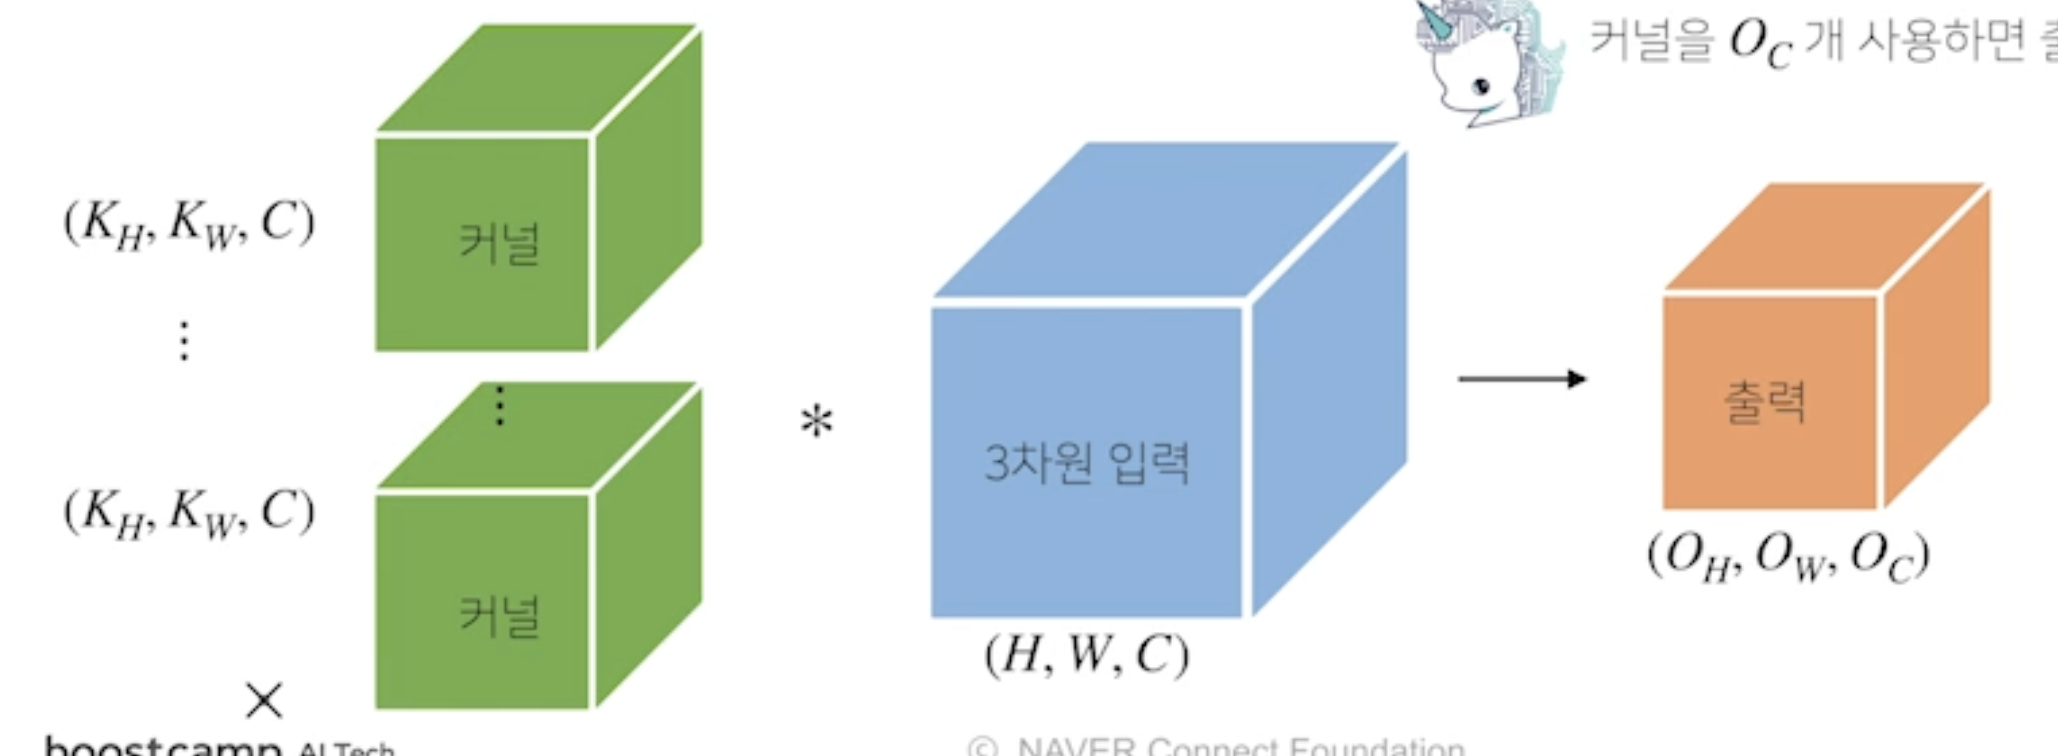

- 커널과 입력의 곱셈에 따라 출력 feature map 하나가 만들어짐
  - 커널의 개수에 따라 feature map 개수가 정해지면서 출력의 개수가 정해짐

##### 역전파

- Convolution 연산은 커널이 모든 입력 데이터에 공통으로 적용되기 때문에 역전파를 계산할 때도 convolution 연산이 나오게 된다

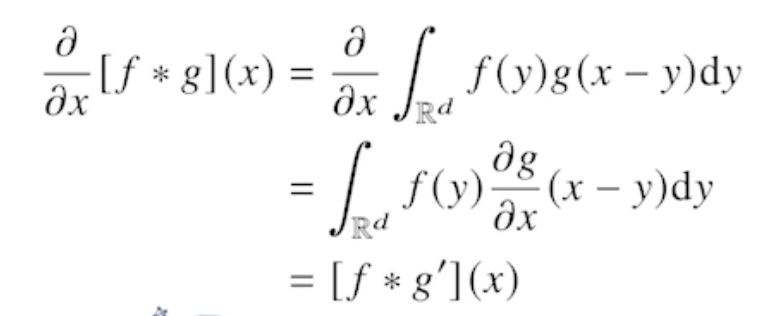

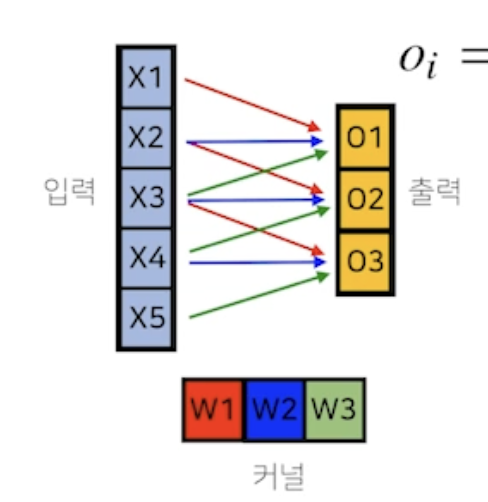

- 입력이 5x1, 커널이 1x3으로 이루어질 때, 출력은 입력 * 커널로 3x1의 출력값이 나온다

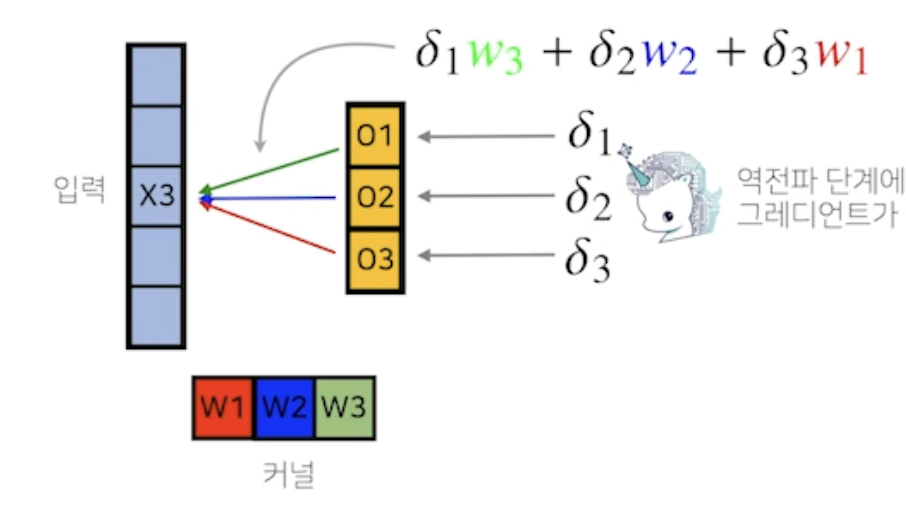

- 역전파 단계에서 해당 미분값을 델타 1~3이라 하고, 입력 x3에 대해 역전파가 일어난다고 할 때, 각 대응되는 가중치를 곱해 gradient를 구하게 된다
  - 즉, 다시 커널을 통해 그레디언트가 전달된다

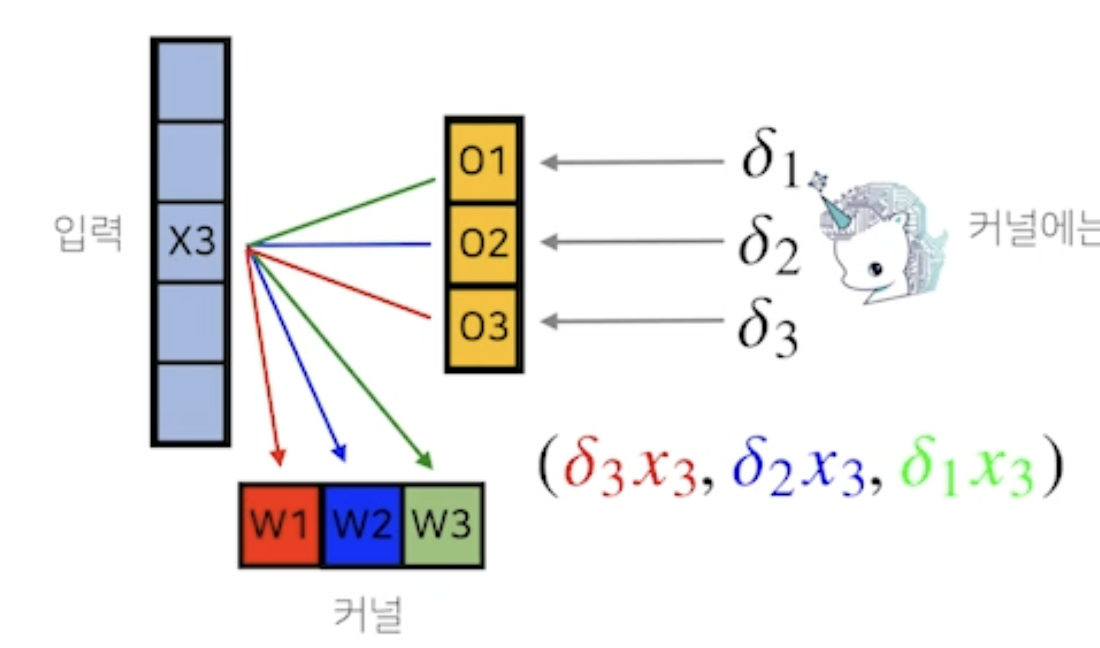

- 각 커널의 값에 곱해진 값이 전달된다

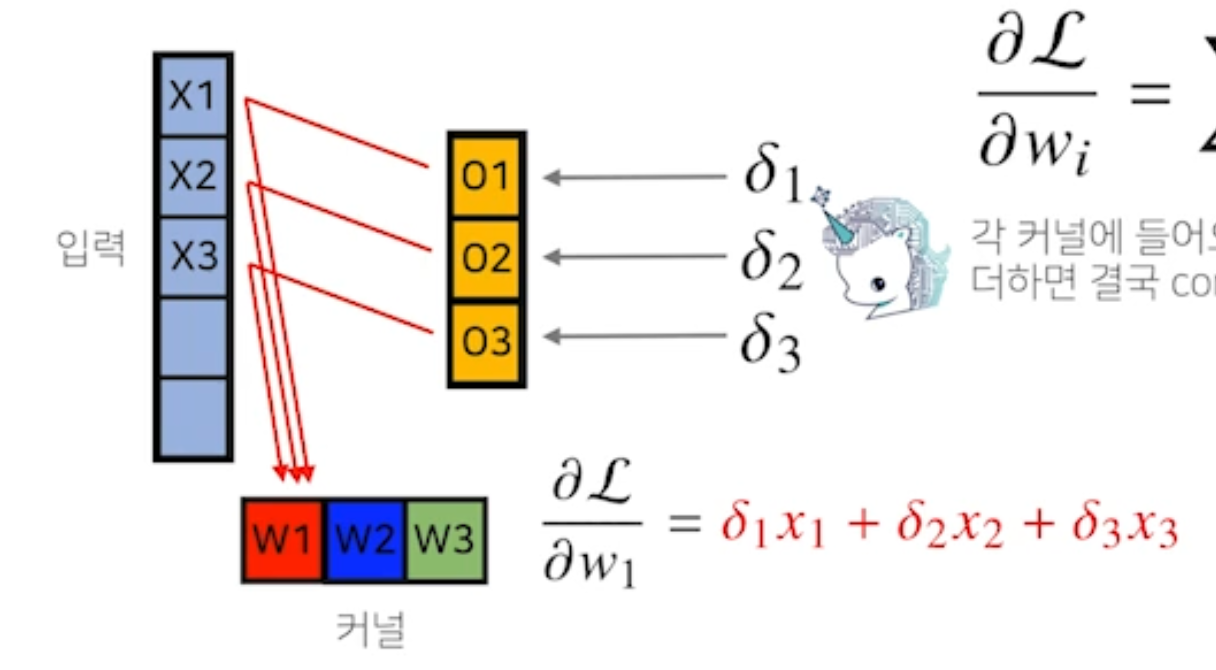

- 해당 과정을 모든 입력층에 적용하게 되면, convolution 연산이 동일하게 나오게 된다